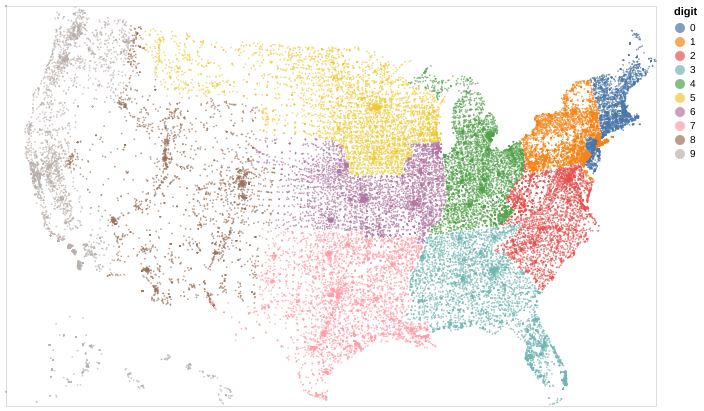

In [2]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

alt.Chart(source).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='digit:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
).transform_calculate(
    "digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
)

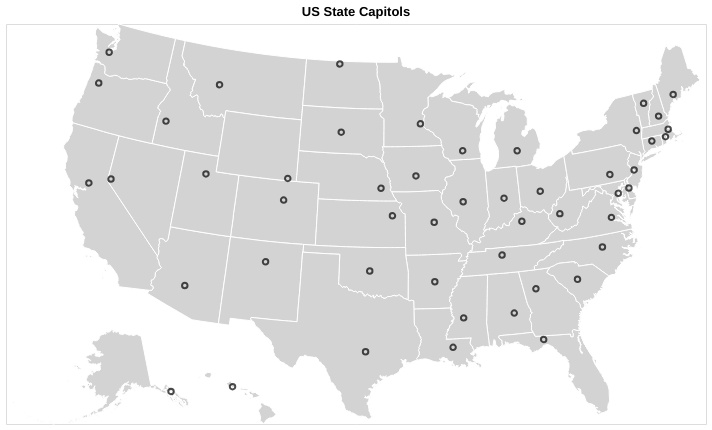

In [25]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
capitals = data.us_state_capitals.url

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    title='US State Capitols',
    width=700,
    height=400
).project('albersUsa')

# Points and text
hover = alt.selection(type='single', on='mouseover', nearest=True,
                      fields=['lat', 'lon'])

base = alt.Chart(capitals).encode(
    longitude='lon:Q',
    latitude='lat:Q'
)

text = base.mark_text(dy=-5, align='right').encode(
    alt.Text('city', type='nominal'),
    opacity=alt.condition(~hover, alt.value(0), alt.value(1))
)

points = base.mark_point().encode(
    color=alt.value('black'),
    size=alt.condition(~hover, alt.value(30), alt.value(100))
).add_selection(hover)

background + points + text

In [72]:
import requests
import pandas as pd
import json

url = "https://conuhacks-playback-api.touchtunes.com/plays"
params = dict(
    startDate='2018-02-19T21:00:00Z',
    endDate='2018-02-19T22:00:00Z',
    offset='0'
)
headers={
    'client-secret': '9923ac9b-8fd3-421f-b0e5-952f807c6885'
}
df = pandas.DataFrame()
num_results = 500 # needs to be a multiple of 20

i = 0
while (i <= num_results - 20):
    r = requests.get(url=url, params=params, headers=headers)
    df = df.append(r.json()['plays'], ignore_index=True)
    i+=20
    params['offset']=str(i)

In [73]:
df

,artistId,latitude,longitude,playDate,songId,state,style
0,552,38.899350,-77.014565,2018-02-19T21:00:00.000+0000,6126506,WA,ROCK
1,552,38.899350,-77.014565,2018-02-19T21:00:00.000+0000,6126506,WA,ROCK
2,552,38.899350,-77.014565,2018-02-19T21:00:00.000+0000,6126506,WA,ROCK
3,552,38.899350,-77.014565,2018-02-19T21:00:00.000+0000,6126506,WA,ROCK
4,385,38.003384,-79.458786,2018-02-19T21:00:01.000+0000,7008808,VA,ROCK
5,385,38.003384,-79.458786,2018-02-19T21:00:01.000+0000,7008808,VA,ROCK
6,385,38.003384,-79.458786,2018-02-19T21:00:01.000+0000,7008808,VA,ROCK
7,186,41.500820,-99.680900,2018-02-19T21:00:02.000+0000,18451301,NE,ROCK
8,186,41.500820,-99.680900,2018-02-19T21:00:02.000+0000,18451301,NE,ROCK
9,186,41.500820,-99.680900,2018-02-19T21:00:02.000+0000,18451301,NE,ROCK


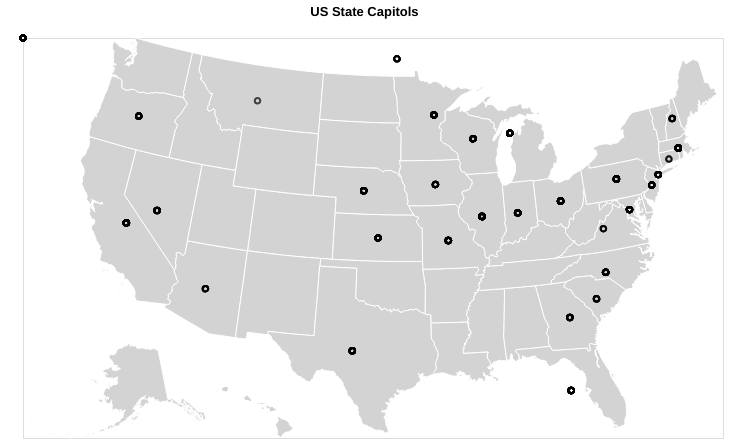

In [77]:
states = alt.topo_feature(data.us_10m.url, 'states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    title='US State Capitols',
    width=700,
    height=400
).project('albersUsa')

# Points and text
hover = alt.selection(type='single', on='mouseover', nearest=True,
                      fields=['latitude', 'longitude'])

base = alt.Chart(df).encode(
    longitude='longitude:Q',
    latitude='latitude:Q'
)

text = base.mark_text(dy=-5, align='right').encode(
    alt.Text('state', type='nominal'),
    opacity=alt.condition(~hover, alt.value(0), alt.value(1))
)

points = base.mark_point().encode(
    color=alt.value('black'),
    size=alt.condition(~hover, alt.value(30), alt.value(100))
).add_selection(hover)

background + points + text